In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [3]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [4]:
input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [8]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [9]:
model1 = load_model('trained model/mnist.h5')

In [10]:
def check_test():    
    for i in range(10):
        rand = np.random.randint(0, len(x_test))
        input_im  = x_test[rand]
        imgplot = plt.imshow(np.squeeze(input_im))
        plt.axis('off')
        plt.show()

        imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
        input_im = input_im.reshape(1,28,28,1) 
        print("Prediction1:", str(model1.predict_classes(input_im, 1, verbose = 0)[0]))

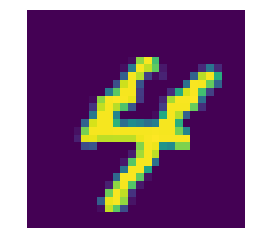

Prediction1: 4


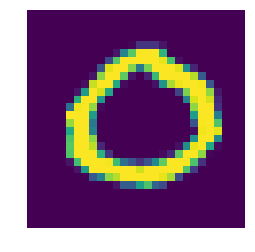

Prediction1: 0


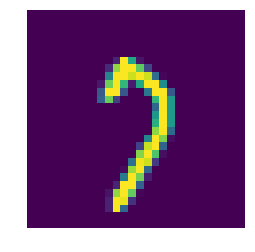

Prediction1: 7


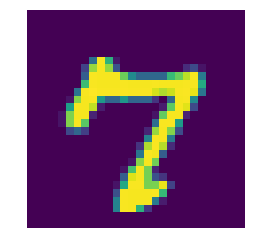

Prediction1: 7


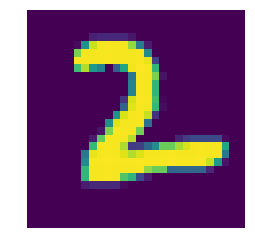

Prediction1: 2


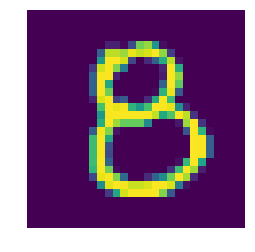

Prediction1: 8


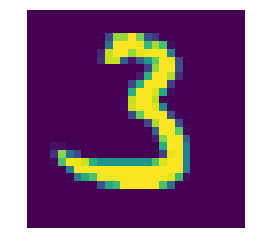

Prediction1: 3


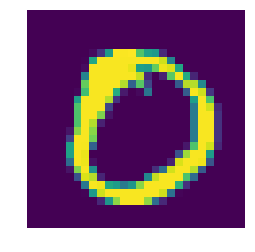

Prediction1: 0


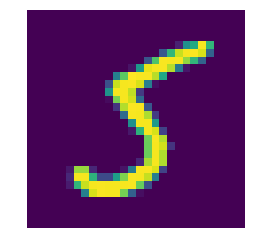

Prediction1: 5


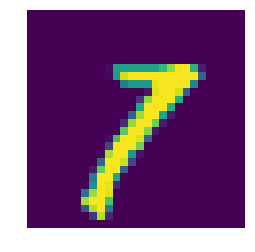

Prediction1: 7


In [11]:
check_test()

In [12]:
def check(i):    
    image = cv2.imread(i)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)
    
    _, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    full_number = []

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)    

        if w >= 5 and h >= 25:
            roi = blurred[y:y + h, x:x + w]
            ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
            roi = makeSquare(roi)
            roi = resize_to_pixel(28, roi)
            roi = roi / 255.0       
            roi = roi.reshape(1,28,28,1) 

            res = str(model1.predict_classes(roi, 1, verbose = 0)[0])
            full_number.append(res)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2) 

    cv2.destroyAllWindows()
    imgplot = plt.imshow(image)
    plt.axis('off')
    plt.show()
    print ("The number is: " + ''.join(full_number))

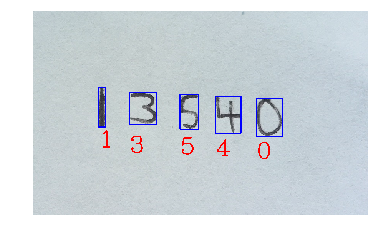

The number is: 13540


In [13]:
check('test/numbers.jpg')

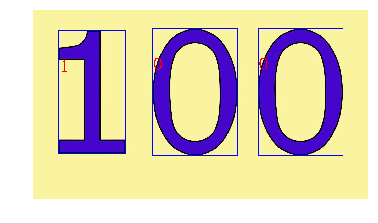

The number is: 100


In [14]:
check('test/100.jpg')

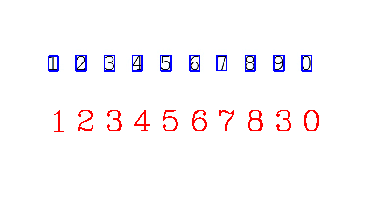

The number is: 1234567830


In [15]:
check('test/check2.jpg')

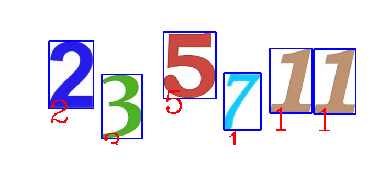

The number is: 235111


In [16]:
check('test/check3.webp')

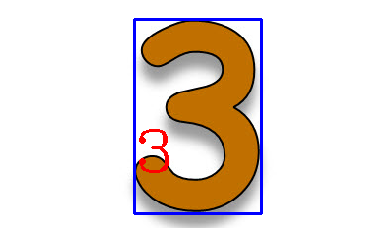

The number is: 3


In [17]:
check('test/number-3_4.jpg')